In [70]:
##########################################################################################
#
#   Qutip-Tutorial
#   @Author: Tjark Ziehm
#   
#
#
#
#
#
###########################################################################################

In [106]:
######################################---IMPORT---####################################
import matplotlib as mpl
from matplotlib import cm
from pylab import *
from qutip import *
import imageio
import numpy as np

from IPython import display

In [73]:
########################################---SETTINGS---################################
#set inline IPython AutoMagic = ON
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [75]:
'''
Lets have a look what we will be able to do with this Tool
'''

states = []

thetas = linspace(0,pi,21)

for theta in thetas:
    states.append((cos(theta/2)*basis(2,0) + sin(theta/2)*basis(2,1)).unit())

animate_bloch(states, duration=0.1, save_all=False)

def animate_bloch(states, duration=0.1, save_all=False):

    b = Bloch()
    b.vector_color = ['r']
    b.view = [-40,30]
    images=[]
    
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
        
    ## normalize colors to the length of data ##
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    b.point_color = list(colors) # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [30]
    
    for i in range(length):
        b.clear()
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='tmp') #saving images to tmp directory
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='pictureState.png'
            b.save(filename)
            
        images.append(imageio.imread(filename))
    
    imageio.mimsave('bloch_anim.gif', images, duration=duration)


In [26]:
states = []
thetas = linspace(0,pi,21)
for theta in thetas:
    states.append((cos(theta/2)*basis(2,0) + sin(theta/2)*basis(2,1)).unit())


animate_bloch(states, duration=0.1, save_all=False)

![SegmentLocal](bloch_anim.gif "segment")

In [30]:
states = ket2dm((basis(2,0) + 1j*basis(2,1)).unit())
animate_bloch(states, duration=0.1, save_all=False)

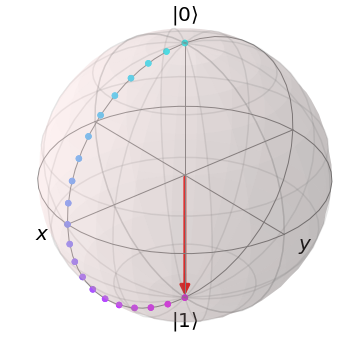

In [107]:

display.Image("./pictureState.png")

### Let us start at the beginning

In [67]:
print(Qobj())

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]


In [68]:
'''
Vergleiche die Ausgabe ohne print()
'''
Qobj()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [105]:
Qobj([[1],[2],[3],[4],[5]])

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]

In [66]:
x = np.array([[1, 2, 3, 4, 5]])
Qobj(x)

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[1. 2. 3. 4. 5.]]

In [65]:
r = np.random.rand(4, 4)
Qobj(r)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.32162407 0.94428864 0.70606291 0.72941037]
 [0.53344838 0.93789018 0.9074162  0.91472981]
 [0.90395233 0.53035023 0.79200666 0.89998004]
 [0.12626658 0.37333597 0.42346034 0.26863721]]

In [82]:
# Pauli-Gate X or Sigma Gate X
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [83]:
# Pauli-Gate Y or Sigma Gate Y
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [85]:
# Pauli-Gate Z or Sigma Gate Z
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [101]:
# Vector with 5 elements and 1.0 at second parameter
basis(5,0)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

# Interact with the Quantum-Object

In [93]:
q = destroy(4)

In [94]:
q.dims

[[4], [4]]

In [95]:
q.shape

(4, 4)

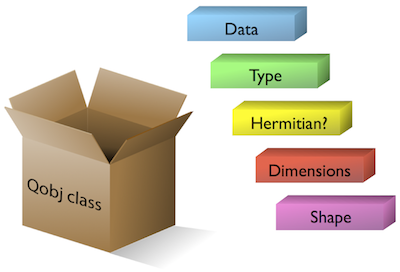

In [108]:
display.Image("./qobj-box.png")

In [109]:
q.data

<4x4 sparse matrix of type '<class 'numpy.complex128'>'
	with 3 stored elements in Compressed Sparse Row format>

In [110]:
q

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]

# Use this knowledge for Quantum-Math

In [114]:
QuantumObjectDestroy = destroy(4)
QuantumObjectPauliX =  sigmax()

In [115]:
QuantumObjectDestroy

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]

In [116]:
QuantumObjectDestroy + 5

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[5.         1.         0.         0.        ]
 [0.         5.         1.41421356 0.        ]
 [0.         0.         5.         1.73205081]
 [0.         0.         0.         5.        ]]

In [125]:
QuantumObjectPauliX * QuantumObjectPauliX


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In [130]:
QuantumObjectDestroy ** 2

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         1.41421356 0.        ]
 [0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

In [132]:
QuantumObjectDestroy ** 3

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

In [137]:
# Returns adjoint (dagger) of object.
'''
delete the *.dag() and compare the type
'''
basis(5, 3).dag()

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[0. 0. 0. 1. 0.]]

In [141]:
QuantumObjectPauliX.full()

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [143]:
QuantumObjectPauliX.groundstate()

(-1.0,
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.70710678]
  [ 0.70710678]])

Lets begin by creating a Fock qutip.states.basis vacuum state vector |0⟩
 with in a Hilbert space with 5 number states, from 0 to 4:

In [158]:
QuantumObjectBase = basis(5, 0)
QuantumObjectBase

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [159]:
QuantumObjectDestroy1 = destroy(5)

QuantumObjectDestroy1

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         1.73205081 0.        ]
 [0.         0.         0.         0.         2.        ]
 [0.         0.         0.         0.         0.        ]]

In [187]:
'''
Here we create a error and change it  ---> Ket Bra ?
True: QuantumObjectDestroy1 * QuantumObjectBase1 
'''
QuantumObjectBase1 * QuantumObjectDestroy1 

TypeError: Incompatible Qobj shapes

In [197]:
#b3d = qutip.Bloch3d()
blochsphere = qutip.Bloch()

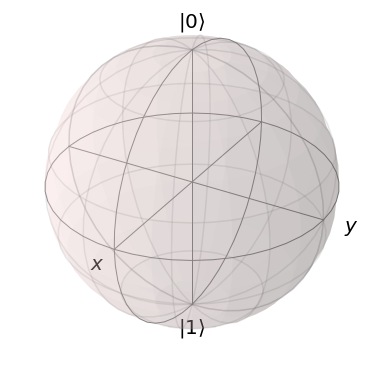

In [198]:
blochsphere.make_sphere()

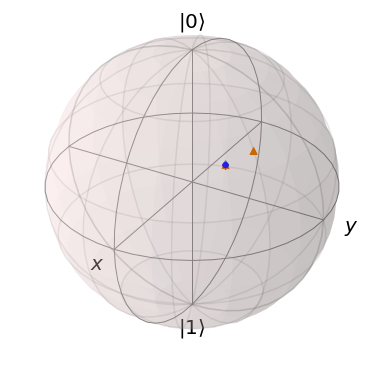

In [216]:
point = 0
#Give an array for x, y, z
point = [1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]
#point = [45,76,80]
blochsphere.add_points(point)
blochsphere.render()

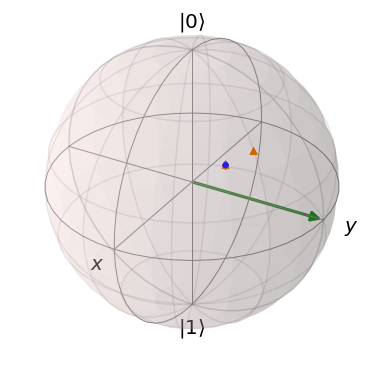

In [218]:
blochsphere.fig.clf()
vector = [0, 1, 0]
blochsphere.add_vectors(vector)
blochsphere.render()

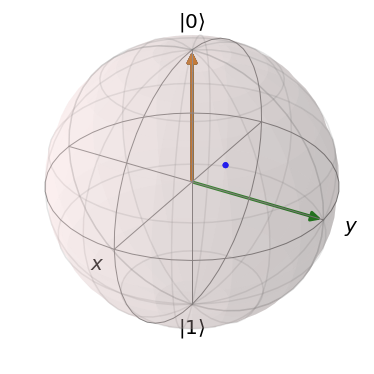

In [232]:
'''
The variable could be written shorter...
'''
up = qutip.basis(2,0)
blochsphere.add_states(up)
blochsphere.render()

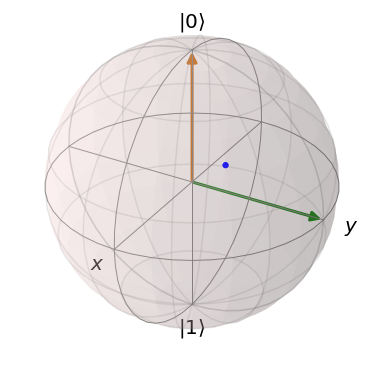

In [233]:
blochsphere = Bloch()

point = [1./np.sqrt(3), 1./np.sqrt(3), 1./np.sqrt(3)]
blochsphere.add_points(pnt)
vector = [0, 1, 0]
blochsphere.add_vectors(vector)
up = qutip.basis(2, 0)
blochsphere.add_states(up)
blochsphere.render()

Time to clean up

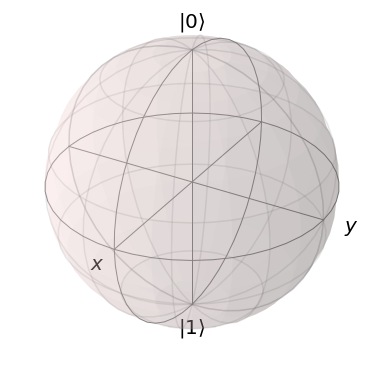

In [235]:
blochsphere.clear()
blochsphere.render()

Lets look to the angels

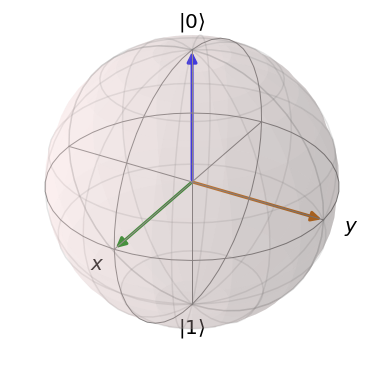

In [236]:
x = (basis(2, 0) + (1+0j)*basis(2, 1)).unit()
y = (basis(2, 0) + (0+1j)*basis(2, 1)).unit()
z = (basis(2, 0) + (0+0j)*basis(2, 1)).unit()

blochsphere.add_states([x, y, z])
blochsphere.render()

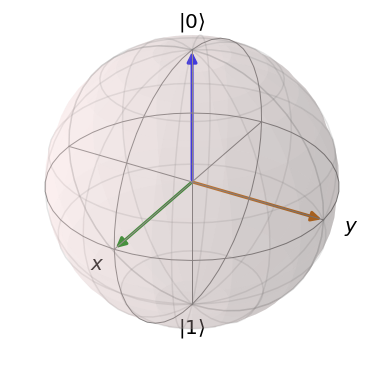

In [245]:
blochsphere.clear()
#blochsphere.size([7,7])

vector = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
blochsphere.add_vectors(vector)
blochsphere.render()

/tmp/ipykernel_8113/4251860867.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-40, elev=30)


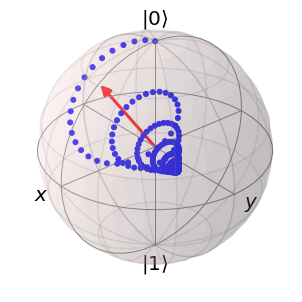

<Figure size 360x360 with 0 Axes>

In [259]:
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30)
sphere = qutip.Bloch(axes=ax)

def animate(i):
   sphere.clear()
   sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
   sphere.add_points([sx[:i+1], sy[:i+1], sz[:i+1]])
   sphere.make_sphere()
   return ax

def init():
   sphere.vector_color = ['r']
   return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
                              init_func=init, blit=False, repeat=False)
ani.save('bloch_sphere.mp4', fps=20)

In [260]:
ffmpeg -i temp/bloch_%01d.png bloch.mp4

SyntaxError: invalid syntax (706768742.py, line 1)